In [7]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = 'Yx5sZi3HBIraX7Gk9iGJ1Dlpe'
consumer_secret = 'OE57ISxhIYngM9fauWiiV4GrQex2WwN7qDKMYfG785cXzQl6Yh'
access_token = '139466009-kpdYEukDcZU9dd3cFmdVGjLVOv0nX1tCyt4vsOWO'
access_token_secret = 'F9nnaiRVToZ3lzJfhSBIxjDizrZZtWyFeoIodWkrrd8Wt'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Target Search Term
target_terms = ("BBC", "CBS", "CNN", "Fox", "New York times")

# Array to hold sentiment
sentiments = []

# Loop through all target users
for target in target_terms:
    
    # Defining a counter
    counter = 1

    # Loop through 2 times (total of 100 tweets excludes missing 'Username')
    for x in range(2):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent", show_user=True)
        #print(public_tweets)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            # Store all the sentiments
            try:
                sentiments.append({"Source Account": tweet['entities']['user_mentions'][0]['name'],
                                   "Media Sources": target,
                                   "Date": tweet["created_at"],
                                   "Tweet Polarity": compound,
                                   "Positive": pos,
                                   "Neutral": neu,
                                   "Negative": neg,
                                   "Tweets Ago": counter})
            except:
                continue
            
            # Add to counter 
            counter = counter + 1
            if counter > 100:
                break

In [9]:
# Convert sentiments list to DataFrame
sentiments_pd = pd.DataFrame(sentiments)
sentiments_pd.head()

# Writing 'sentiments_pd' data to CSV
sentiments_pd.to_csv("Sentiments_DF.csv")

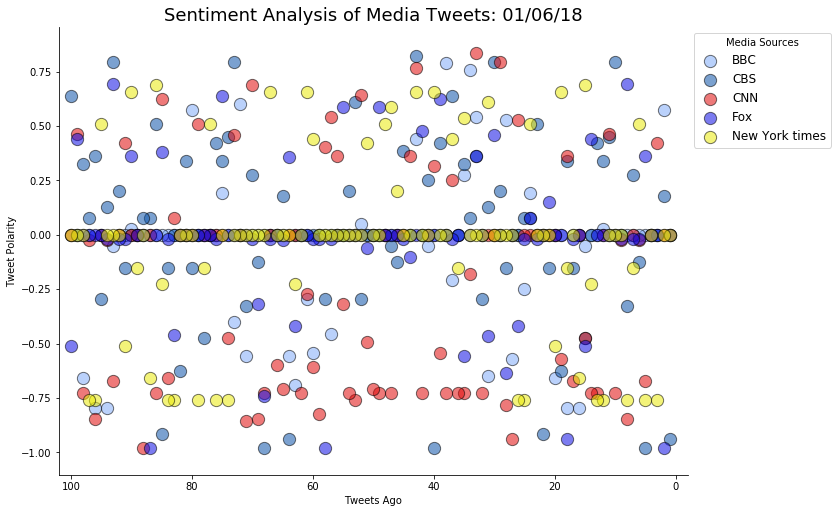

In [4]:
#create lmplot using seasborn

#set colorlist for charts
clrlist = ["#82acf9", "#0f55aa", "#e00b0b", "#1010e5", "#eaea0b"]

#sns.set_palette(clrlist)
sns.color_palette(clrlist)

#create chart
MediaTweetAnalysis = sns.lmplot(x="Tweets Ago", y="Tweet Polarity", data=sentiments_pd, 
           hue="Media Sources", size=7, aspect=1.4,
           legend_out=False, legend=True, 
           scatter_kws={"s":150, 'alpha':.55, 'edgecolors':"black", 'linewidth':1}, 
                                fit_reg=False, palette=clrlist)
plt.xlim(102,-2)
plt.title("Sentiment Analysis of Media Tweets: %s" % time.strftime('%x'), fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), ncol=1, title="Media Sources", fontsize=12)
plt.savefig("Sentiment_Analysis_of_Media_Tweets.png", bbox_inches='tight')
plt.show(MediaTweetAnalysis)

In [10]:
# Calculating the aggreate for each of the media sentiment
Aggr_Sentiments = sentiments_pd.groupby("Media Sources")
Aggr_Sentiments = Aggr_Sentiments['Tweet Polarity'].mean().reset_index()
Aggr_Sentiments

,Media Sources,Tweet Polarity
0,BBC,-0.037554
1,CBS,-0.019934
2,CNN,-0.109109
3,Fox,0.007203
4,New York times,-0.020996


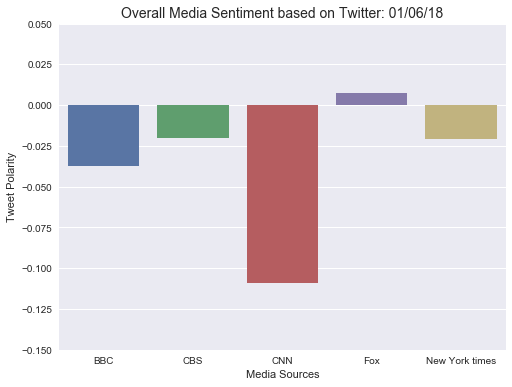

In [12]:
#create barplot using seaborn
OverallMedia_Sentiment = sns.barplot(x="Media Sources", y="Tweet Polarity", data=Aggr_Sentiments, 
                                     saturation=0.75, errcolor='.26', ci=95, n_boot=1000)
sns.set(rc={'figure.figsize':(8,6)})
plt.ylim(-.15,.05)
    
plt.title("Overall Media Sentiment based on Twitter: %s" % time.strftime('%x'), fontsize=14)
plt.savefig("Overall_Media_Sentiment.png", bbox_inches='tight')
plt.show(OverallMedia_Sentiment)